In [5]:
import os
import sys
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
import json
import matplotlib.pyplot as plt
from data_provider.data_split_recorder import split_recorder

In [6]:
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)

def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                 labelsize=fontsize # y轴字体大小设置
                  ) 
    ax.tick_params(axis='x',
                 labelsize=fontsize # x轴字体大小设置
                  ) 

def set_draft(the_plt, other_ax=''):
    ax = the_plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel('')
    plt.ylabel('')
    if other_ax:
        other_ax.axes.xaxis.set_ticklabels([])
        other_ax.axes.yaxis.set_ticklabels([])
        other_ax.set_ylabel('')
        other_ax.set_xlabel('')

def set_draft_fig(fig):
    for ax in fig.axes:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_ylabel('')
        ax.set_xlabel('')

In [7]:
def calculate_multiple(number, threshold):
    # 计算商和余数
    quotient = number // threshold
    remainder = number % threshold
    
    # 判断余数是否大于等于阈值的一半
    if remainder >= threshold / 2:
        quotient = quotient+1
    else:
        pass

    if quotient == 0:
        return 1
    else:
        return quotient
    
data_path = '../gate_data'
gate_data = 'formats' # temperatures, cathodes, anodes, formats
target = 'Na'
threshold = 100

data = json.load(open(f'{data_path}/{gate_data}.json'))
training_data = split_recorder.MIX_large_train_files
print(len(training_data))
gate_frequency = {}
for key, value in data.items():
    # print(key)
    # if target == 'Na' and not key.startswith('NA-ion'):
    #     continue
    # if target == 'Zn' and not key.startswith('ZN-ion'):
    #     continue

    if not key in training_data:
        continue
    if gate_data == 'temperatures':
        pass
    elif gate_data == 'cathodes':
        value = '_'.join(value)
    elif gate_data == 'formats':
        # value = '_'.join(value)
        value = value[0]
    else:
        # anode
        value = value[0]
        if value == 'carbon' or value =='artificial graphite' or value == 'graphite':
            value = 'graphite '
        
    gate_frequency[value] = gate_frequency.get(value, 0) + 1


if gate_data == 'temperatures':
    gate_frequency = {k: v for k, v in sorted(gate_frequency.items(), key=lambda item: item[0])}
    for key, value in gate_frequency.items():
        expert_num = calculate_multiple(value, threshold)
        print(key, value, expert_num, value/expert_num/threshold)
else:
    for key, value in gate_frequency.items():
        expert_num = calculate_multiple(value, threshold)
        print(key, value, expert_num, value/expert_num/threshold)

515
prismatic 9 1 0.09
cylindrical 301 3 1.0033333333333332
pouch 205 2 1.025


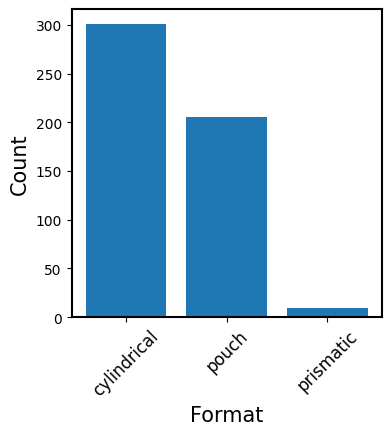

In [8]:
gate_frequency = sorted(gate_frequency.items(), key=lambda x:x[1], reverse=True)
numbers = []
things = []
for (thing, number) in gate_frequency:
    things.append(thing)
    numbers.append(number)


fig = plt.figure(figsize=(4,4))
if gate_data == 'cathodes':
    plt.xlabel('Cathode', fontsize=15)
elif gate_data == 'temperatures':
    plt.xlabel('Temperature', fontsize=15)
elif gate_data == 'formats':
    plt.xlabel('Format', fontsize=15)
elif gate_data == 'anodes':
    plt.xlabel('Anode', fontsize=15)

plt.bar([i for i in range(len(numbers))],numbers)
plt.ylabel('Count', fontsize=15)

set_ax_linewidth(fig.gca())
plt.xticks(ticks=range(len(things)), labels=things, rotation=45, fontsize=12)
plt.show()